In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
)

# Make plots a bit larger by default
plt.rcParams['figure.figsize'] = (7, 5)

In [3]:
#Create a small synthetic dataset
data = {
    'Weather': ['Sunny', 'Rainy', 'Sunny', 'Sunny', 'Rainy', 'Rainy', 'Sunny', 'Rainy'],
    'Windy':   [0,        1,       0,        1,        0,        1,        0,       1],
    'Play':    [1,        0,       1,        1,        0,        0,        1,       0]
}
df_synthetic = pd.DataFrame(data)
df_synthetic

,Weather,Windy,Play
0,Sunny,0,1
1,Rainy,1,0
2,Sunny,0,1
3,Sunny,1,1
4,Rainy,0,0
5,Rainy,1,0
6,Sunny,0,1
7,Rainy,1,0


Encode categorical feature and prepare X, y
Machine learning models in sklearn expect numeric inputs. We will encode:

Sunny → 1
Rainy → 0
Windy is already numeric (0/1), so we can use it directly. The target variable Play is already 0/1.

In [4]:
#Encode categorical feature and prepare X, y
df_synthetic['Weather_num'] = df_synthetic['Weather'].map({'Sunny':1, 'Rainy':0})
X_syn = df_synthetic[['Weather_num','Windy']]
y_syn = df_synthetic['Play']
print(X_syn)
print(y_syn)

   Weather_num  Windy
0            1      0
1            0      1
2            1      0
3            1      1
4            0      0
5            0      1
6            1      0
7            0      1
0    1
1    0
2    1
3    1
4    0
5    0
6    1
7    0
Name: Play, dtype: int64


rain a simple decision tree
We now train a decision tree classifier.

We set max_depth=3 just to keep the tree small.
We fit the model on all data (since the goal here is intuition, not evaluation).

In [6]:
#Train a simple decision tree
tree_syn = DecisionTreeClassifier(max_depth=3, random_state=42) # limit depth to avoid overfitting on small dataset
tree_syn.fit(X_syn,y_syn) # what it does is to find patterns in the data to predict the target variable y_syn based on features X_syn
tree_syn # trained decision tree model

DecisionTreeClassifier(max_depth=3, random_state=42)

Visualize the tree
Now we plot the tree. This helps students see:

The root split
Branches
Leaf predictions
How many samples go to each node
Note: class_names=['No', 'Yes'] aligns with Play: 0 = No, 1 = Yes.

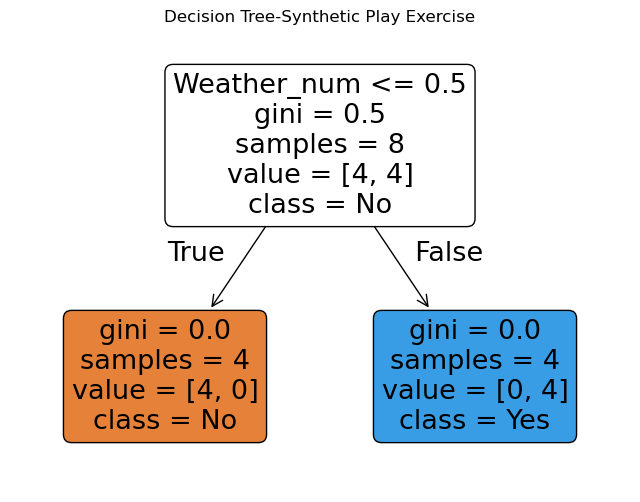

In [7]:
#Visualize the tree
plt.figure(figsize=(8,6))
plot_tree(
    tree_syn,
    feature_names=['Weather_num','Windy'],
    class_names = ['No', 'Yes'],
    filled = True,
    rounded = True,
)
plt.title("Decision Tree-Synthetic Play Exercise")
plt.show()